In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression as linR
import seaborn as sns
import matplotlib.pyplot as plt


## Reading data

In [15]:
train_path = './train.csv'
train_df = pd.read_csv(train_path, 
                       keep_default_na=False # let pandas keep the default 'NA', 'None' as valid entry
                       )
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [24]:
# check total missing data
train_df.isnull().sum().unique()

array([0], dtype=int64)

We observed that the entries contains no missing value, let us assigned label for categorical features

In [25]:
# get the columns that is type 'objects'
qualitative_feature = [feature for feature in train_df.columns if train_df.dtypes[feature] == 'object']

In [26]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [30]:
train_df[qualitative_feature] = train_df[qualitative_feature].apply(lambda col:le.fit_transform(col))

now we create heatmap of correlation value from our dataframe

In [33]:
corr = train_df.corr()

<Axes: >

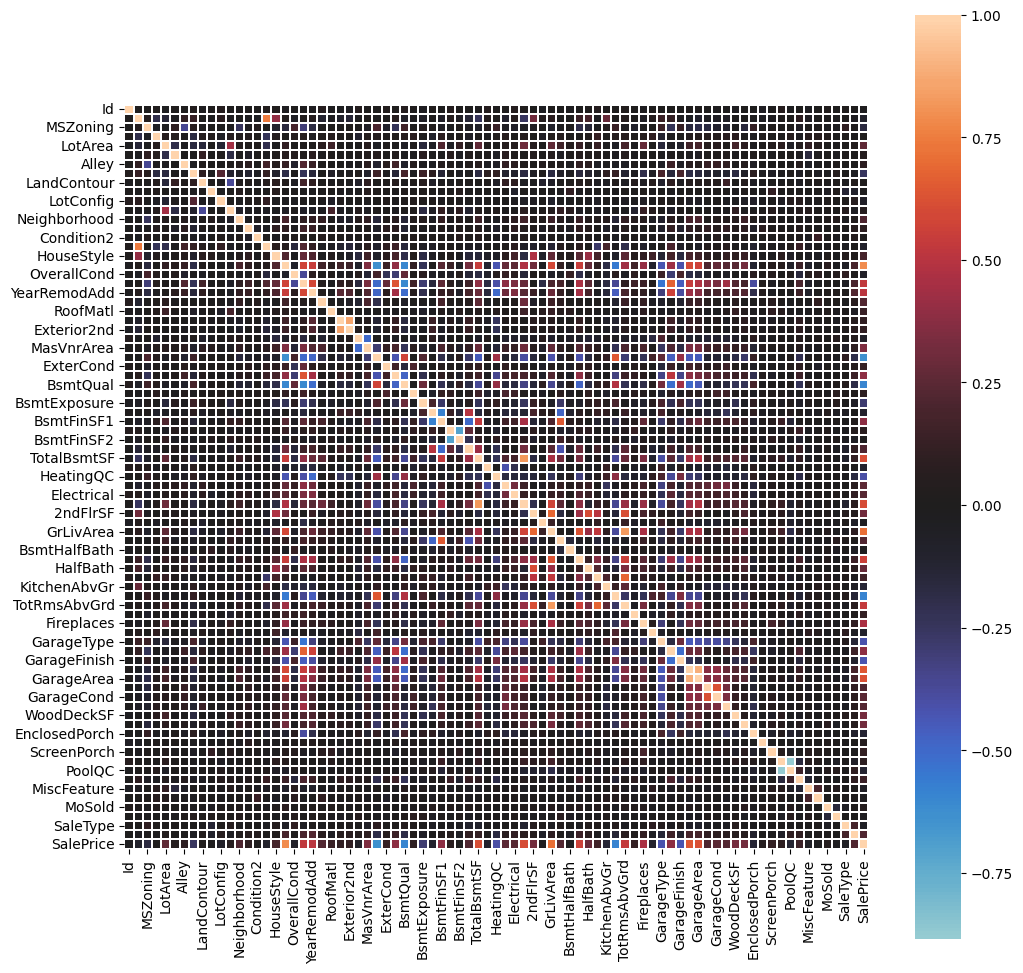

In [40]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,center = 0, linewidths=0.01,square=True)

As we obsered on the heat map, only selected values has some effect on our SalePrice, let us look at them

In [54]:
parameter = (
    corr[(corr['SalePrice'] > 0.5) | 
         (corr['SalePrice'] < -0.5)]
    ['SalePrice'].index)

In [64]:
parameter= parameter.to_list()

In [65]:
parameter.remove('SalePrice')
parameter

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [62]:
corr[(corr['SalePrice'] > 0.5) |(corr['SalePrice'] < -0.5)]['SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
ExterQual      -0.636884
BsmtQual       -0.593734
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

## Train Data based on the above parameter

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [68]:
X = train_df[parameter]
y = train_df['SalePrice']

In [69]:
train_X,val_X, train_y,val_y = train_test_split(X,y,random_state=1)

In [71]:
le_model = linR()

In [72]:
le_model.fit(train_X,train_y)

LinearRegression()

In [73]:
val_pred = le_model.predict(val_X)

In [74]:
val_mae = mean_absolute_error(val_pred, val_y)
print("Validation MAE : {:,.0f}".format(val_mae))

Validation MAE : 22,318


As we see, our prediction on saleprice are offs by 22,318 USD, about 10% of SalePrice statistic quanatile value at 0.75.

## Analyze the large MAE result

In [75]:
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [105]:
error_df = pd.DataFrame()
error_df['pred']= val_pred
error_df['val'] = val_y.reset_index()['SalePrice']
error_df['error'] = error_df['pred'] - error_df['val']

<Axes: >

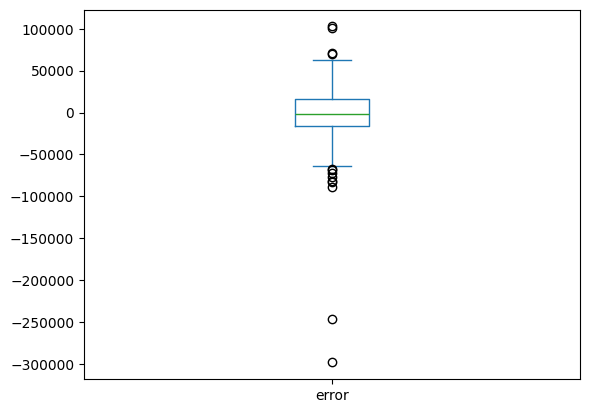

In [145]:
error_df.error.plot(kind='box')

c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: >

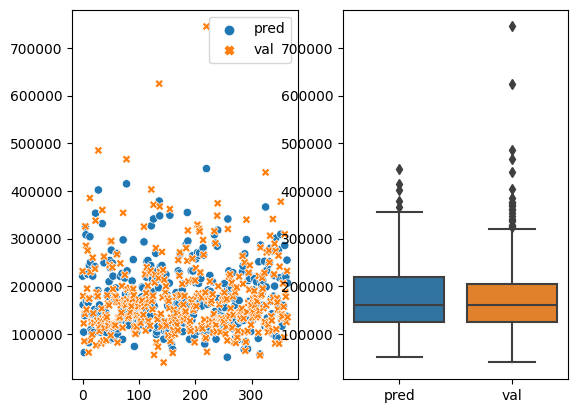

In [117]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.scatterplot(error_df[['pred','val']],ax=ax1)
sns.boxplot(error_df[['pred','val']],ax=ax2)

We observerd that the outliers in real value contributes to the large differs in MAE calculation, we should consider cut offs the outliers in training data before running the training model.

## Cut off value for outliers

c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

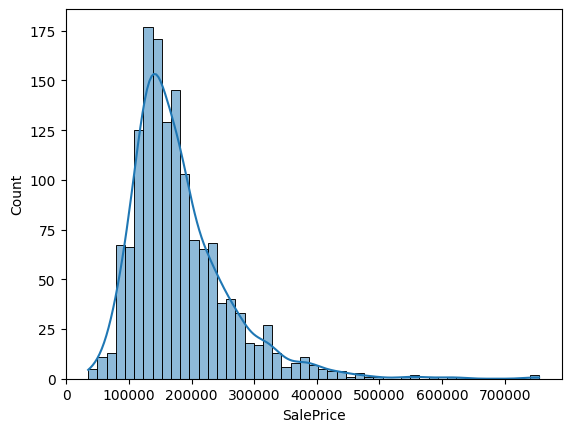

In [84]:
SalePrice = train_df.SalePrice
sns.histplot(SalePrice,kde=True)

<Axes: >

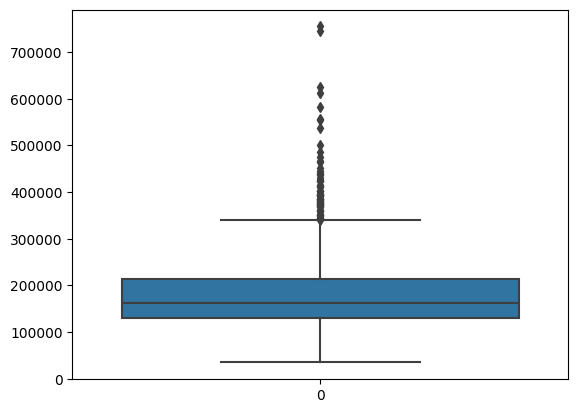

In [87]:
sns.boxplot(SalePrice)

In [88]:
# quick calculation of outliers:
IQR = SalePrice.quantile(0.75)-SalePrice.quantile(0.25)
max_whisker = SalePrice.quantile(0.75) + 1.5*IQR
max_whisker

340037.5

As linear regression are affected by outliers. We will cut off any value that above this number

## Create new training

In [118]:
df = pd.read_csv('./train.csv',keep_default_na=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [121]:
# cut off
df = df[df['SalePrice'] < 340037.5]

Add masks to qualitative features

In [123]:
df[qualitative_feature] = df[qualitative_feature].apply(lambda col:le.fit_transform(col))

Create Correlation and Heatmap, make sure out parameters is the same

<Axes: >

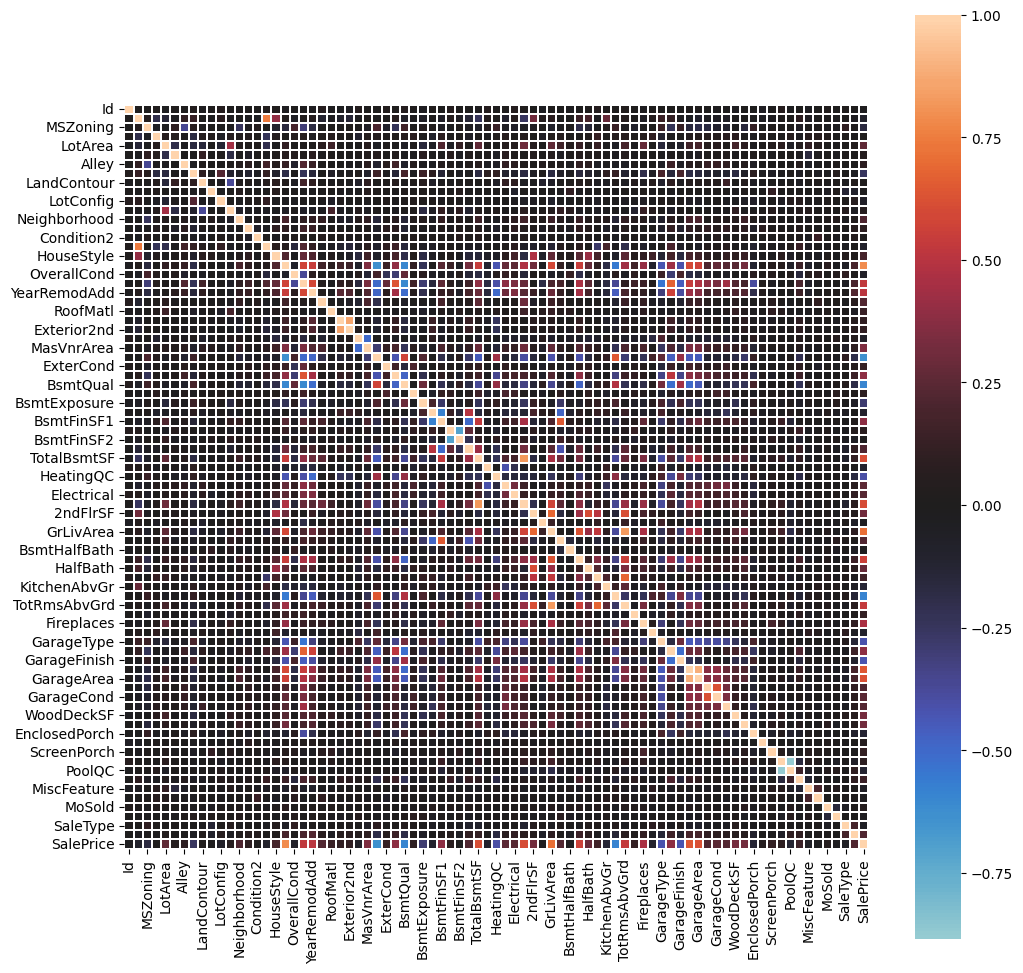

In [124]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,center = 0, linewidths=0.01,square=True)

In [144]:
(
    corr[(corr['SalePrice'] > 0.5) | 
         (corr['SalePrice'] < -0.5)]
    ['SalePrice'].index)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

We observed that our parameters is the same as the above list, let us continue use the 'parameter' that we previous defined

In [127]:
parameter

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

## Train with the New df

In [141]:
X = df[parameter]
y = df['SalePrice']
train_X,val_X, train_y,val_y = train_test_split(X,y,random_state=1)
le_model = linR()

In [142]:
# fit the model
le_model.fit(train_X,train_y)
# prediction
val_pred = le_model.predict(val_X)

In [143]:
# check MAE
val_mae = mean_absolute_error(val_pred, val_y)
print("Validation MAE : {:,.0f}".format(val_mae))

Validation MAE : 20,247


## Validate the new MAE

In [146]:
error_df = pd.DataFrame()
error_df['pred']= val_pred
error_df['val'] = val_y.reset_index()['SalePrice']
error_df['error'] = error_df['pred'] - error_df['val']

<Axes: >

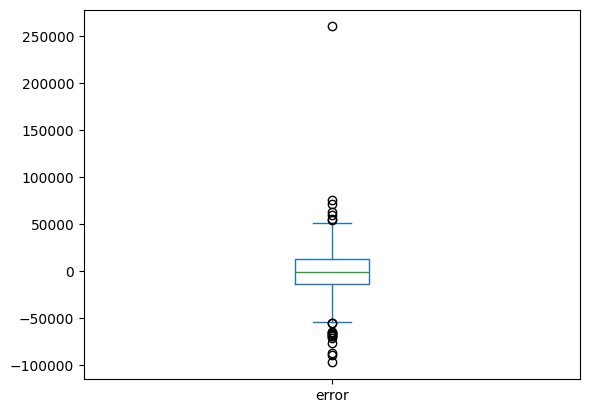

In [148]:
error_df.error.plot(kind='box')

c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\Documents\testlab\pandas4E\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

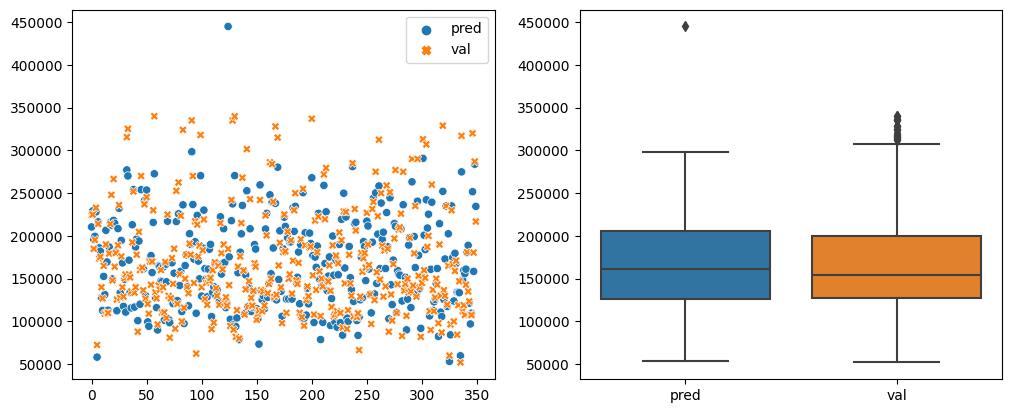

In [150]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.scatterplot(error_df[['pred','val']],ax=ax1)
sns.boxplot(error_df[['pred','val']],ax=ax2)
fig.set_figwidth(12)

We observed that our data spread looks close enough. the predicting model currently has 90% accuracy, for now it is good enough

# ANOVA?

In [151]:
from scipy.stats import f_oneway

In [152]:
f_oneway(error_df['pred'], error_df['val'])

F_onewayResult(statistic=0.12234103232726012, pvalue=0.7266146990095875)

Just FYI, quick ANOVA shows that these are 2 performance could be pretty close to each other. 